# Kedro Setup

In [137]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [138]:
%reload_kedro

[08/17/24 20:27:16] INFO     Resolved project path as:                                              ]8;id=442020;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=395162;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             C:\Users\benab\AppData\Local\GitHubDesktop\app-3.3.12\dsti_goodreads_r                
                             ating_predictions\goodreads-predictor.                                                
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/17/24 20:27:17] INFO     Kedro project goodreads-predictor                                      ]8;id=642690;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=688854;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=204841;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=499850;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=613190;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=582988;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [139]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go # For the waterfall plot -- cannot easily do this in matplotlib
from typing import List, Dict, Tuple, Any



In [140]:
context.catalog.list()


[
    'books_raw',
    'books_loaded',
    'publisher_consolidation',
    'price_by_isbn_input',
    'price_by_isbn',
    'book_genres',
    'title_embeddings_original',
    'authors_embeddings',
    'description_embeddings',
    'open_library_book_api_info_input',
    'open_library_book_api_info',
    'filtered_books',
    'exclusions_summary',
    'scope_waterfall_plot',
    'parameters',
    'params:title_column',
    'params:author_column',
    'params:description_column',
    'params:original_data_key_column',
    'params:color_gr_brown',
    'params:color_gr_purple',
    'params:color_gr_green',
    'params:color_gr_tan_background'
]

# Initial Data Setup

In [141]:
books_input = catalog.load('books_loaded')
price_by_isbn = catalog.load('price_by_isbn')
title_embeddings = catalog.load('title_embeddings_original')
book_api_data = catalog.load('open_library_book_api_info')
authors_embeddings = catalog.load('authors_embeddings')

# Get the color values
color_gr_brown = catalog.load("params:color_gr_brown")
color_gr_purple = catalog.load("params:color_gr_purple")
color_gr_green = catalog.load("params:color_gr_green")
color_gr_tan_background = catalog.load("params:color_gr_tan_background")

# Add in the price data
books_input = books_input.merge(price_by_isbn, on='isbn13', how='left')

                    INFO     Loading data from books_loaded (ParquetDataset)...                 ]8;id=610415;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=146386;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from price_by_isbn (ParquetDataset)...                ]8;id=239617;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=877358;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from title_embeddings_original (ParquetDataset)...    ]8;id=935110;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=245285;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from open_library_book_api_info (PickleDataset)...    ]8;id=674991;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=327845;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from authors_embeddings (ParquetDataset)...           ]8;id=970892;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=588963;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py#508\508]8;;\

[08/17/24 20:27:18] INFO     Loading data from params:color_gr_brown (MemoryDataset)...         ]8;id=477869;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=686985;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:color_gr_purple (MemoryDataset)...        ]8;id=401485;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=959481;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:color_gr_green (MemoryDataset)...         ]8;id=285283;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=214739;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from params:color_gr_tan_background                   ]8;id=13526;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=32073;file://C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\kedro\io\data_catalog.py#508\508]8;;\
                             (MemoryDataset)...                                                                    

In [142]:
data = books_input

In [143]:
df = data.merge(title_embeddings)


In [144]:
df = data.merge(authors_embeddings)

# Basic Data Exploration


In [145]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# List of columns
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Price', 'PriceStrategy',
       'authors_embedding'],
      dtype='object')


In [147]:
# Display the first few rows of the dataframe
print(df.head())

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690               27591   
1           eng         

In [148]:
# Get a concise summary (data types and non-null counts)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  Price               11112 non-null  float64
 13  PriceStrategy       11123 non-null  object 
 14  authors_embedding   11123 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+

In [149]:
# Statistical summary of numerical features
print(df.describe())

             bookID  average_rating        isbn13     num_pages  \
count  11123.000000    11123.000000  1.112300e+04  11123.000000   
mean   21310.856963        3.934075  9.759880e+12    336.405556   
std    13094.727252        0.350485  4.429758e+11    241.152626   
min        1.000000        0.000000  8.987060e+09      0.000000   
25%    10277.500000        3.770000  9.780345e+12    192.000000   
50%    20287.000000        3.960000  9.780582e+12    299.000000   
75%    32104.500000        4.140000  9.780872e+12    416.000000   
max    45641.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_count         Price  
count   1.112300e+04        11123.000000  11112.000000  
mean    1.794285e+04          542.048099      4.653637  
std     1.124992e+05         2576.619589    134.010129  
min     0.000000e+00            0.000000   -999.000000  
25%     1.040000e+02            9.000000      8.990000  
50%     7.450000e+02           47.000000     16.000000

## Distribution of Ratings

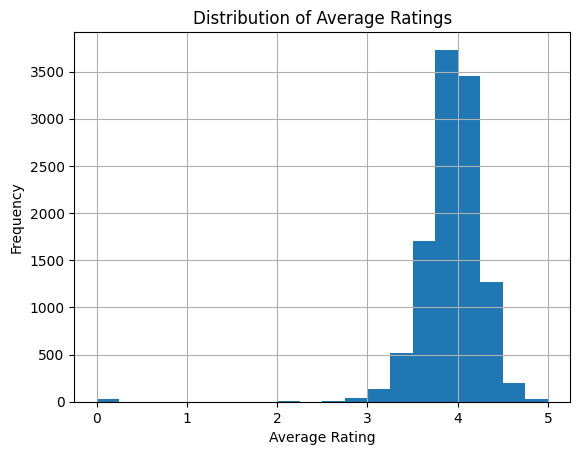

In [150]:
import matplotlib.pyplot as plt

# Histogram of average ratings
df['average_rating'].hist(bins=20)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# EDA

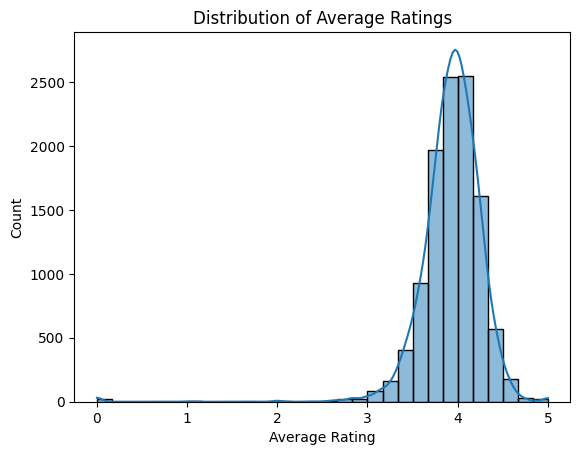

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.show()

                    WARNING  C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\seaborn\ ]8;id=500965;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py\warnings.py]8;;\:]8;id=500698;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py#110\110]8;;\
                             categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated                
                             and will be removed in a future version of pandas.                                    
                               positions = grouped.grouper.result_index.to_numpy(dtype=float)                      
                                                                                                                   

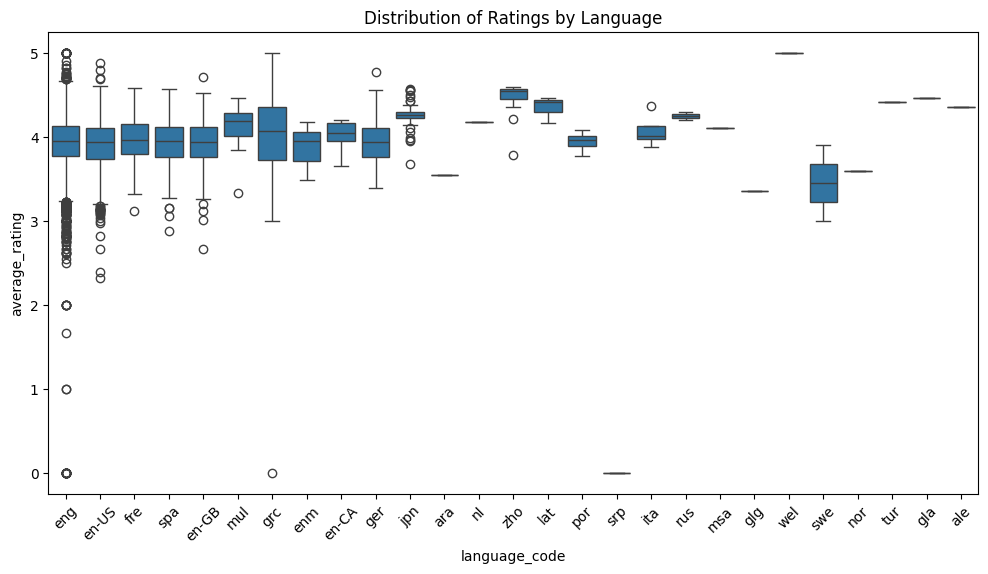

In [152]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='language_code', y='average_rating', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Ratings by Language')
plt.show()

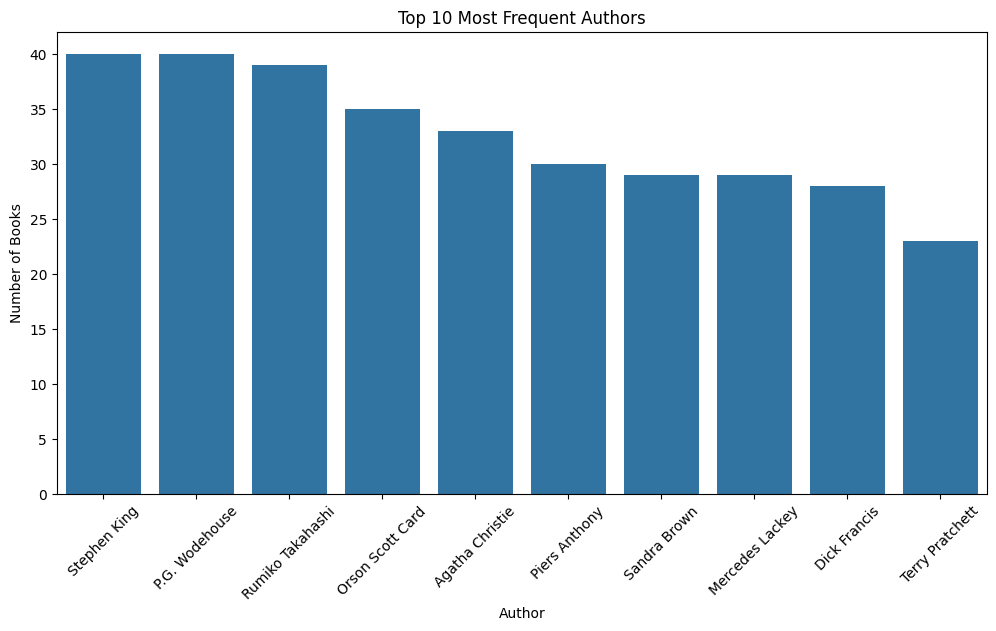

In [153]:
top_authors = df['authors'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.title('Top 10 Most Frequent Authors')
plt.xticks(rotation=45)
plt.ylabel('Number of Books')
plt.xlabel('Author')
plt.show()

## Statistical Analysis

In [154]:
from scipy.stats import ttest_ind

english_ratings = df[df['language_code'] == 'eng']['average_rating']
french_ratings = df[df['language_code'] == 'fre']['average_rating']

t_stat, p_val = ttest_ind(english_ratings, french_ratings, equal_var=False)
print("T-test statistic:", t_stat)
print("P-value:", p_val)

T-test statistic: -1.6648461393078011
P-value: 0.09800987627379489


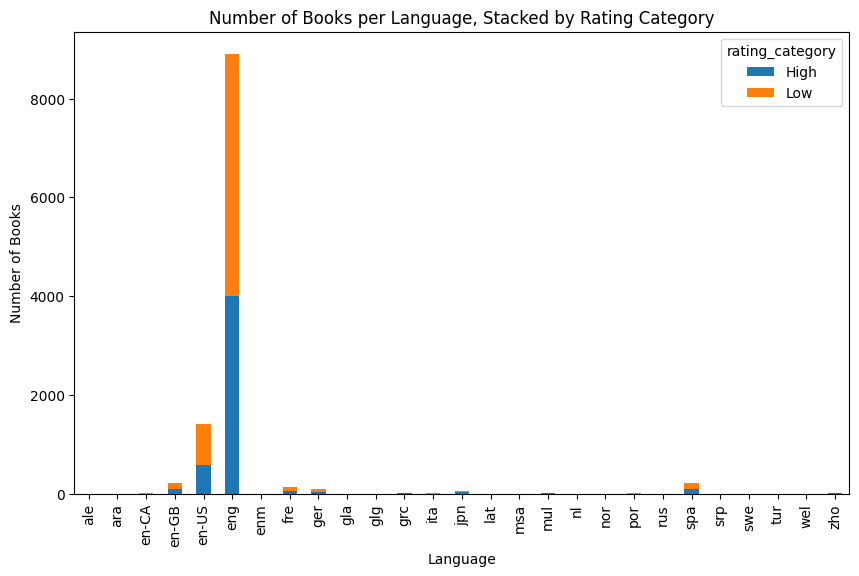

In [155]:
# Create a high/low rating category
df['rating_category'] = df['average_rating'].apply(lambda x: 'High' if x >= 4.0 else 'Low')
ct = pd.crosstab(df['language_code'], df['rating_category'])
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Books per Language, Stacked by Rating Category')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.show()

bookID                 0
title                  0
authors                0
average_rating         0
isbn                   0
isbn13                 0
language_code          0
  num_pages            0
ratings_count          0
text_reviews_count     0
publication_date       0
publisher              0
Price                 11
PriceStrategy          0
authors_embedding      0
rating_category        0
dtype: int64


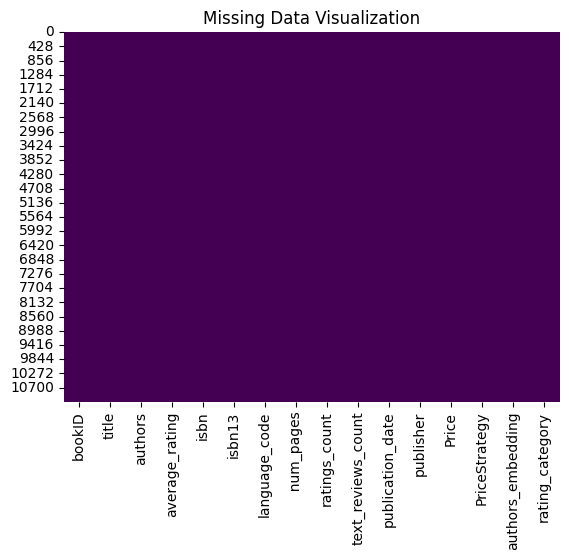

In [156]:
# Count missing values in each column
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

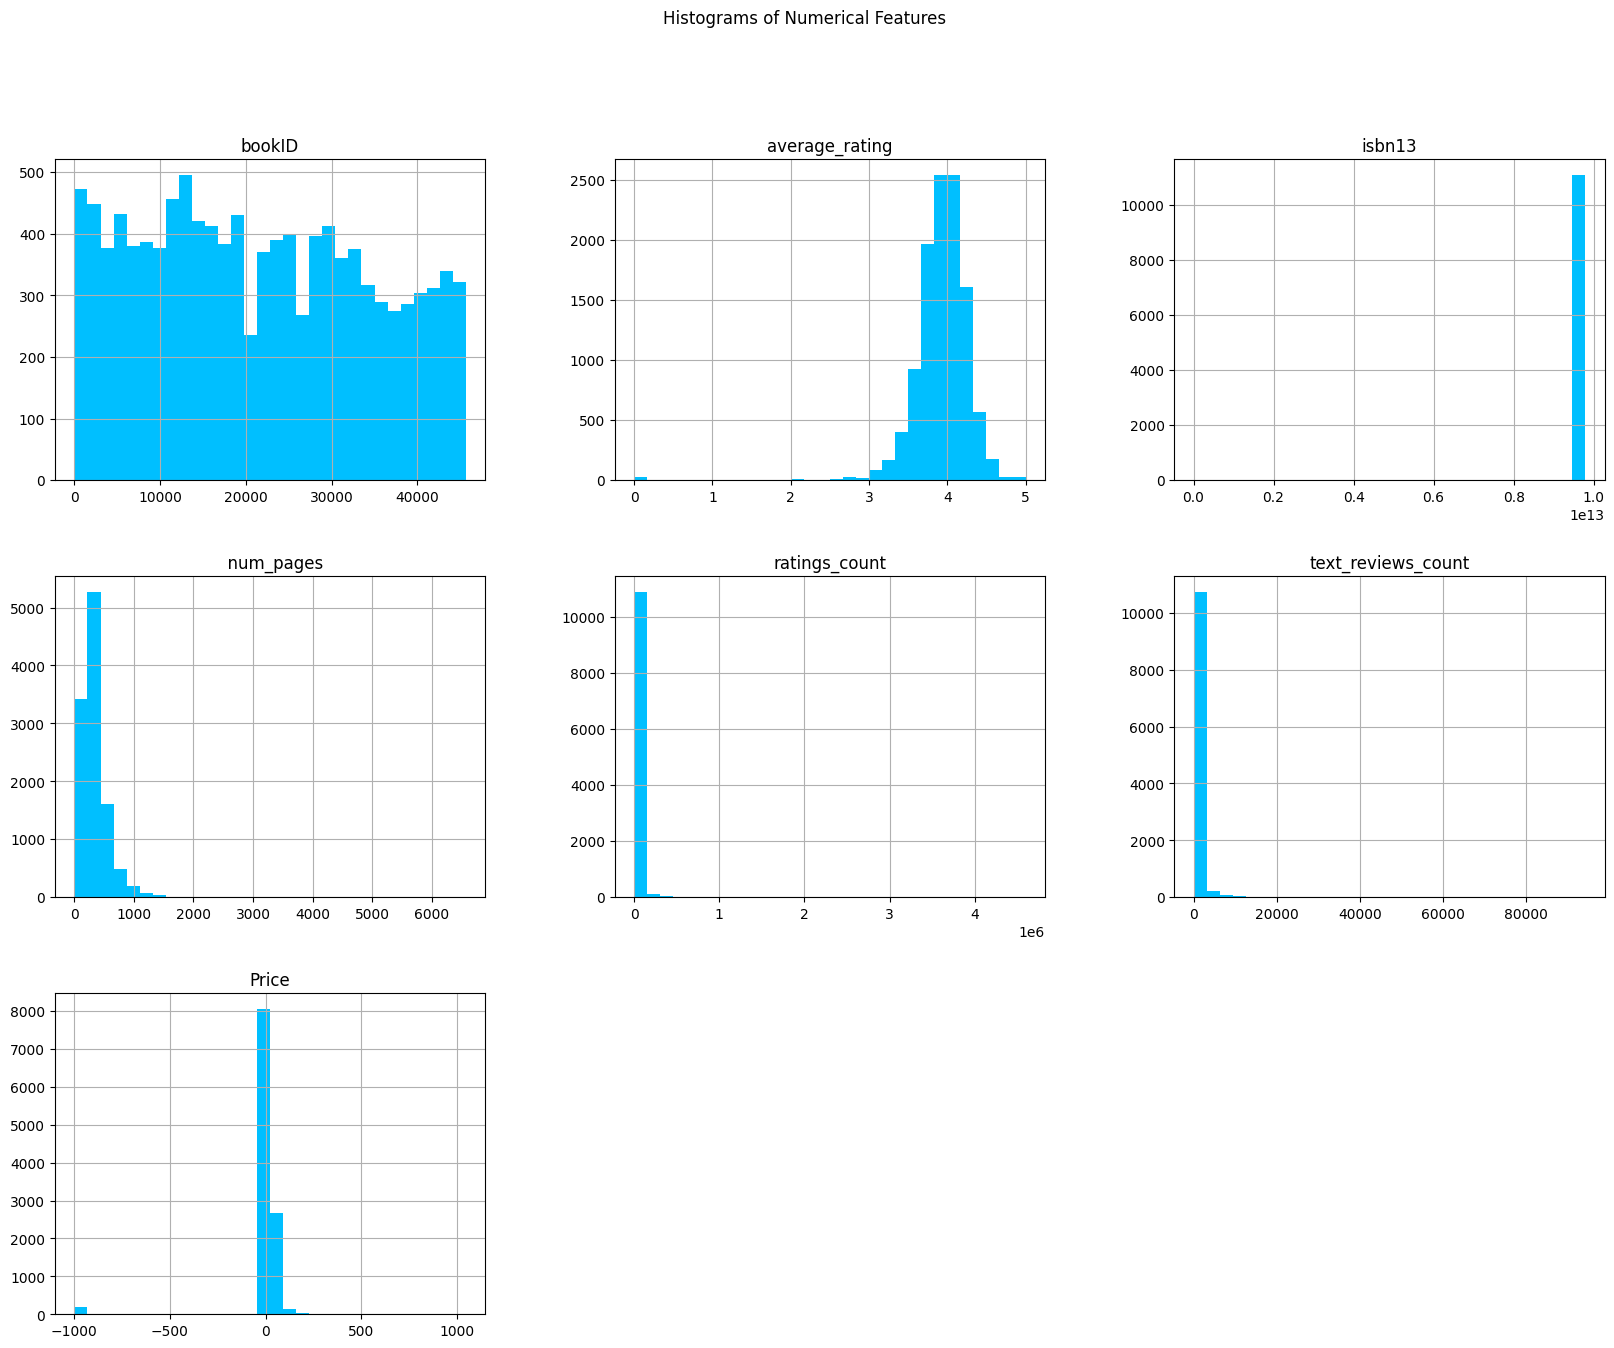

In [157]:
df.hist(bins=30, figsize=(20, 15), color='deepskyblue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Initial Modeling - Distribution of Actual vs. Predicted Ratings

In [158]:
# Calculate the median rating by publisher
median_ratings = df.groupby('publisher')['average_rating'].median().reset_index()
median_ratings.rename(columns={'average_rating': 'median_rating'}, inplace=True)

In [159]:
# Merge the median ratings back to the original dataframe
df = df.merge(median_ratings, on='publisher', how='left')

In [160]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error between actual ratings and median ratings
mae = mean_absolute_error(df['average_rating'], df['median_rating'])
print(f'Mean Absolute Error of the Benchmark Model: {mae:.2f}')

Mean Absolute Error of the Benchmark Model: 0.17


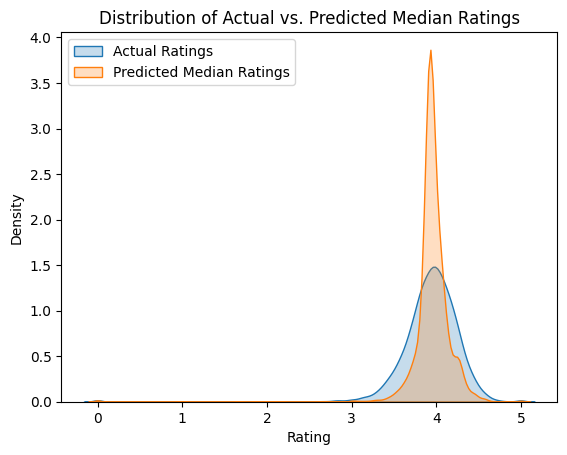

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted ratings
sns.kdeplot(df['average_rating'], label='Actual Ratings', fill=True)
sns.kdeplot(df['median_rating'], label='Predicted Median Ratings', fill=True)
plt.title('Distribution of Actual vs. Predicted Median Ratings')
plt.xlabel('Rating')
plt.legend()
plt.show()

# Book Description Clusters

In [162]:
# Print the first few entries of the 'authors_embedding' column
print(df['authors_embedding'].head())

0    [-0.30315670371055603, 0.11502666771411896, -0...
1    [-0.30315670371055603, 0.11502666771411896, -0...
2    [-0.22978533804416656, 0.1457509994506836, -0....
3    [-0.30315670371055603, 0.11502666771411896, -0...
4    [-0.30315670371055603, 0.11502666771411896, -0...
Name: authors_embedding, dtype: object


In [163]:
from sklearn.cluster import KMeans

# The data is normally correctly formatted as arrays in a list
X = np.array(list(df['authors_embedding']))

# Apply KMeans or other clustering algorithms
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

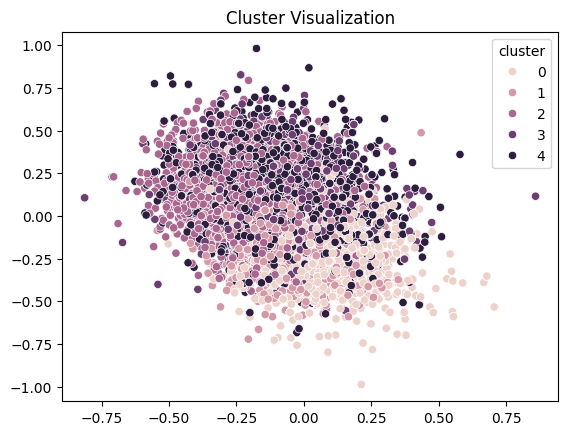

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df['cluster'])
plt.title('Cluster Visualization')
plt.show()

In [165]:
# Print the centers of each cluster
print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[ 0.07657491 -0.22142493 -0.09229967 ... -0.30994949 -0.10064688
   0.00123612]
 [-0.06621036 -0.14856326 -0.14697691 ... -0.26513077 -0.05426138
  -0.01429214]
 [-0.19621672  0.11212315 -0.21247204 ... -0.20592388 -0.00390487
   0.04396857]
 [-0.08622894  0.13057185 -0.13497469 ... -0.16898448 -0.102333
   0.0345925 ]
 [-0.09144895  0.12509388 -0.20265916 ... -0.23646375 -0.05683315
   0.04377727]]


In [166]:
# Example: Assuming there's a 'title' column in your DataFrame
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i} titles:")
    print(df[df['cluster'] == i]['title'].head(10))  # Adjust according to your DataFrame's columns


Cluster 0 titles:
31                        Molly Hatchet - 5 of the Best
34                          Changeling (Changeling  #1)
35                                   The Changeling Sea
37                                       The Changeling
38           The Changeling (Daughters of England  #15)
53                                 The Heidi Chronicles
54    The Heidi Chronicles: Uncommon Women and Other...
55    Active Literacy Across the Curriculum: Strateg...
56                      Simply Beautiful Beaded Jewelry
58    Mapping the Big Picture: Integrating Curriculu...
Name: title, dtype: object

Cluster 1 titles:
0     Harry Potter and the Half-Blood Prince (Harry ...
1     Harry Potter and the Order of the Phoenix (Har...
3     Harry Potter and the Prisoner of Azkaban (Harr...
4     Harry Potter Boxed Set  Books 1-5 (Harry Potte...
29    Hatchet: A Guide for Using "Hatchet" in the Cl...
33    A Changeling for All Seasons (Changeling Seaso...
36                                     

In [167]:
# Example: Statistical summary of ratings in each cluster
cluster_summary = df.groupby('cluster')['average_rating'].describe()
print(cluster_summary)

          count      mean       std  min   25%   50%   75%   max
cluster                                                         
0        1746.0  3.878591  0.298989  1.0  3.70  3.89  4.07  5.00
1        1256.0  3.927038  0.394322  0.0  3.77  3.96  4.14  5.00
2        2810.0  3.976897  0.358419  0.0  3.82  4.00  4.18  5.00
3        1453.0  3.987460  0.326379  0.0  3.82  4.00  4.19  4.62
4        3858.0  3.910181  0.353739  0.0  3.76  3.94  4.10  5.00


[08/17/24 20:27:21] WARNING  C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\seaborn\ ]8;id=878233;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py\warnings.py]8;;\:]8;id=23627;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py#110\110]8;;\
                             _base.py:949: FutureWarning: When grouping with a length-1 list-like,                 
                             you will need to pass a length-1 tuple to get_group in a future                       
                             version of pandas. Pass `(name,)` instead of `name` to silence this                   
                             warning.                                                                              
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\seaborn\ ]8;id=15154;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py\warnings.py]8;;\:]8;id=809573;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py#110\110]8;;\
                             _base.py:949: FutureWarning: When grouping with a length-1 list-like,                 
                             you will need to pass a length-1 tuple to get_group in a future                       
                             version of pandas. Pass `(name,)` instead of `name` to silence this                   
                             warning.                                                                              
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\seaborn\ ]8;id=648240;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py\warnings.py]8;;\:]8;id=71057;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py#110\110]8;;\
                             _base.py:949: FutureWarning: When grouping with a length-1 list-like,                 
                             you will need to pass a length-1 tuple to get_group in a future                       
                             version of pandas. Pass `(name,)` instead of `name` to silence this                   
                             warning.                                                                              
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\seaborn\ ]8;id=109769;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py\warnings.py]8;;\:]8;id=134839;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py#110\110]8;;\
                             _base.py:949: FutureWarning: When grouping with a length-1 list-like,                 
                             you will need to pass a length-1 tuple to get_group in a future                       
                             version of pandas. Pass `(name,)` instead of `name` to silence this                   
                             warning.                                                                              
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\seaborn\ ]8;id=354700;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py\warnings.py]8;;\:]8;id=623773;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py#110\110]8;;\
                             _base.py:949: FutureWarning: When grouping with a length-1 list-like,                 
                             you will need to pass a length-1 tuple to get_group in a future                       
                             version of pandas. Pass `(name,)` instead of `name` to silence this                   
                             warning.                                                                              
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

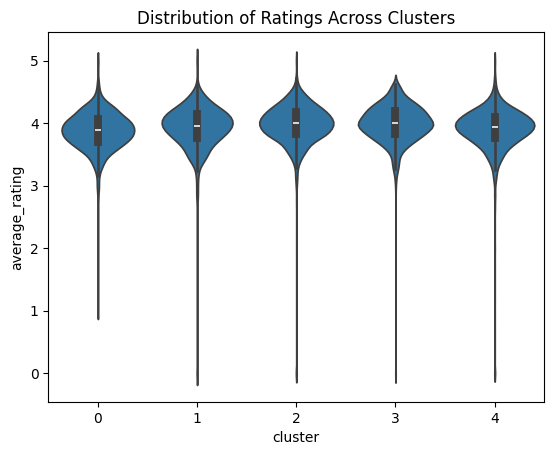

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot of ratings across clusters
sns.violinplot(x='cluster', y='average_rating', data=df)
plt.title('Distribution of Ratings Across Clusters')
plt.show()

# Feature Engeneering

In [169]:
from scipy.spatial.distance import pdist

# Create a feature for the number of books written by each author
def create_num_books_written(df):
    df['num_books_written'] = df.groupby('authors')['bookID'].transform('count')
    return df

# Create a feature for the total number of reviews for all books by each author
def create_total_author_reviews(df):
    df['total_author_reviews'] = df.groupby('authors')['text_reviews_count'].transform('sum')
    return df

# Calculate the average pairwise Euclidean distance between all books written by an author
def calculate_book_variation(df):
    df['book_variation'] = df.groupby('authors')['authors_embedding'].transform(
        lambda x: np.mean(pdist(np.vstack(x))) if len(x) > 1 else 0)
    return df

# Apply author-related feature engineering
df = create_num_books_written(df)
df = create_total_author_reviews(df)
df = calculate_book_variation(df)

print(df.head())

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  ...  \
0           eng          652        2095690               27591  ...   
1           en

## Publisher Features

In [170]:
# Create a feature for the total number of books published by each publisher
def create_total_books_published(df):
    df['total_books_published'] = df.groupby('publisher')['bookID'].transform('count')
    return df

# Create a feature for the number of unique authors published by each publisher
def create_num_published_authors(df):
    df['num_published_authors'] = df.groupby('publisher')['authors'].transform('nunique')
    return df

# Calculate the average price of books published by each publisher
def calculate_average_book_price(df):
    df['average_book_price'] = df.groupby('publisher')['Price'].transform('mean')
    return df

# Calculate the price variation (mean absolute deviation) for books published by each publisher
def calculate_price_variation(df):
    df['price_variation'] = df.groupby('publisher')['Price'].transform(lambda x: np.mean(np.abs(x - np.mean(x))))
    return df

# Apply publisher-related feature engineering
df = create_total_books_published(df)
df = create_num_published_authors(df)
df = calculate_average_book_price(df)
df = calculate_price_variation(df)

print(df.head())

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  ...  \
0           eng          652        2095690               27591  ...   
1           en

## Book Features

In [179]:
def create_optimal_binning(df, column_name):
    if column_name not in df.columns:
        raise KeyError(f"Column '{column_name}' not found in the DataFrame.")
    
    df = df.dropna(subset=[column_name])  # Drop rows where column_name has NaN
    
    est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    df.loc[:, f'{column_name}_tier'] = est.fit_transform(df[[column_name]])
    
    return df

df.rename(columns=lambda x: x.strip(), inplace=True)


# Check if 'num_pages' exists and apply the binning
print(df.columns)  # Print the columns to verify
df = create_optimal_binning(df, 'Price')
df = create_optimal_binning(df, 'ratings_count')
df = create_optimal_binning(df, 'num_pages')  # This line will now raise a KeyError if the column doesn't exist

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Price', 'PriceStrategy',
       'authors_embedding', 'rating_category', 'median_rating', 'cluster',
       'num_books_written', 'total_author_reviews', 'book_variation',
       'total_books_published', 'num_published_authors', 'average_book_price',
       'price_variation', 'description_cluster', 'Price_tier',
       'ratings_count_tier'],
      dtype='object')


In [180]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer

# Cluster books based on their description embeddings
def cluster_book_descriptions(df, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['description_cluster'] = kmeans.fit_predict(df['authors_embedding'].tolist())
    return df

# Create optimal binning for numerical features like Price, ratings_count, and num_pages
def create_optimal_binning(df, column_name):
    est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    df[f'{column_name}_tier'] = est.fit_transform(df[[column_name]])
    return df

# Calculate the percentage of text reviews out of all reviews
def create_text_review_percentage(df):
    df['text_review_percentage'] = df['text_reviews_count'] / df['ratings_count']
    return df

# Apply book-related feature engineering
df = cluster_book_descriptions(df)
df = create_optimal_binning(df, 'Price')
df = create_optimal_binning(df, 'ratings_count')
df = create_optimal_binning(df, 'num_pages')
df = create_text_review_percentage(df)

print(df.head())

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code  num_pages  ratings_count  text_reviews_count  ...  \
0           eng        652        2095690               27591  ...   
1           eng   

## ALL In One

In [182]:
def feature_engineering(df):
    df = create_num_books_written(df)
    df = create_total_author_reviews(df)
    df = calculate_book_variation(df)
    df = create_total_books_published(df)
    df = create_num_published_authors(df)
    df = calculate_average_book_price(df)
    df = calculate_price_variation(df)
    df = cluster_book_descriptions(df)
    df = create_optimal_binning(df, 'Price')
    df = create_optimal_binning(df, 'ratings_count')
    df = create_optimal_binning(df, 'num_pages')
    df = create_text_review_percentage(df)
    return df

# Apply all the feature engineering steps
df = feature_engineering(df)

# Display the updated DataFrame
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 11112 entries, 0 to 11122
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bookID                  11112 non-null  int64  
 1   title                   11112 non-null  object 
 2   authors                 11112 non-null  object 
 3   average_rating          11112 non-null  float64
 4   isbn                    11112 non-null  object 
 5   isbn13                  11112 non-null  int64  
 6   language_code           11112 non-null  object 
 7   num_pages               11112 non-null  int64  
 8   ratings_count           11112 non-null  int64  
 9   text_reviews_count      11112 non-null  int64  
 10  publication_date        11112 non-null  object 
 11  publisher               11112 non-null  object 
 12  Price                   11112 non-null  float64
 13  PriceStrategy           11112 non-null  object 
 14  authors_embedding       

## Stats

In [183]:
# Summary statistics for the newly created features
print("Summary Statistics for Engineered Features:")
engineered_features = ['Price_tier', 'ratings_count_tier', 'num_books_written', 'total_author_reviews', 
                       'book_variation', 'total_books_published', 'num_published_authors', 
                       'average_book_price', 'price_variation', 'description_cluster']
print(df[engineered_features].describe())

Summary Statistics for Engineered Features:
         Price_tier  ratings_count_tier  num_books_written  \
count  11112.000000        11112.000000       11112.000000   
mean       1.970752            0.004230           4.771778   
std        0.265208            0.085277           6.778900   
min        0.000000            0.000000           1.000000   
25%        2.000000            0.000000           1.000000   
50%        2.000000            0.000000           2.000000   
75%        2.000000            0.000000           6.000000   
max        4.000000            4.000000          40.000000   

       total_author_reviews  book_variation  total_books_published  \
count          11112.000000    1.111200e+04           11112.000000   
mean            3405.333153    1.643618e-07              46.903888   
std             9707.677412    3.881436e-07              70.068268   
min                0.000000    0.000000e+00               1.000000   
25%               20.000000    0.000000e+00    

## Distribution

In [185]:
# Display the distribution of books across clusters
print("Cluster Distribution:")
print(df['description_cluster'].value_counts())

# Display the average rating per cluster
print("Average Rating per Cluster:")
print(df.groupby('description_cluster')['average_rating'].mean())

Cluster Distribution:
description_cluster
3    3235
4    2354
2    2266
0    1787
1    1470
Name: count, dtype: int64
Average Rating per Cluster:
description_cluster
0    3.952395
1    3.992320
2    3.957824
3    3.909484
4    3.894444
Name: average_rating, dtype: float64


In [186]:
# Display a few samples from each cluster
print("Sample Data from Each Cluster:")
for cluster_id in df['description_cluster'].unique():
    print(f"\nCluster {cluster_id}:")
    print(df[df['description_cluster'] == cluster_id].head(3))

Sample Data from Each Cluster:

Cluster 2:
   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   

  language_code  num_pages  ratings_count  text_reviews_count  ...  \
0           eng        652        2095690               27591  ...   
1           eng        870        2153167               29221  ...   
3           eng        435        2339585               36325  ...   

  book_variation total_books_published  num_published_authors  \
0   4.408683e-07                    13           

[08/17/24 20:40:27] WARNING  C:\Users\benab\AppData\Roaming\Python\Python311\site-packages\seaborn\ ]8;id=975521;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py\warnings.py]8;;\:]8;id=681635;file://c:\Users\benab\anaconda3\envs\goodread\Lib\warnings.py#110\110]8;;\
                             categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated                
                             and will be removed in a future version of pandas.                                    
                               positions = grouped.grouper.result_index.to_numpy(dtype=float)                      
                                                                                                                   

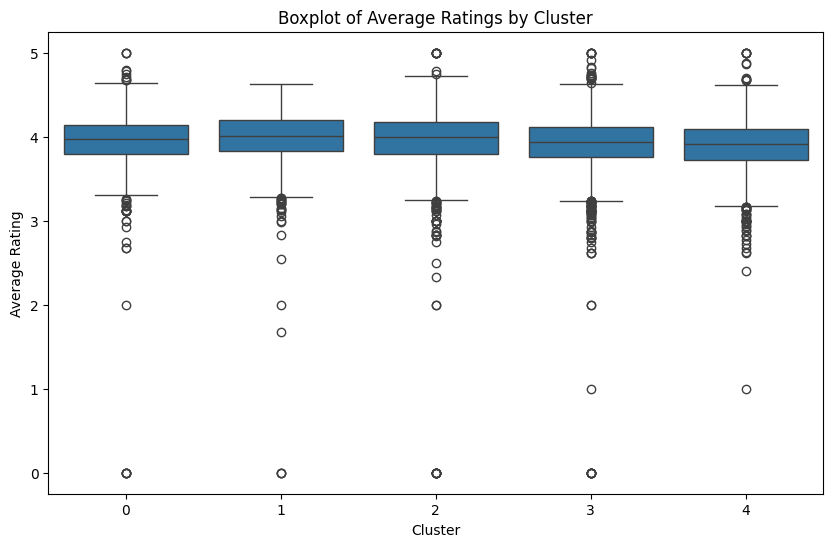

In [188]:
# Boxplot of average ratings by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='description_cluster', y='average_rating', data=df)
plt.title("Boxplot of Average Ratings by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Rating")
plt.show()